In [ ]:
Download link: https://www.kaggle.com/datasets/brijbhushannanda1979/bigmart-sales-data?select=Train.csv

# importing libraries

In [13]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBRegressor
from sklearn import metrics

In [11]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


# Get Data


In [14]:
big_mart = pd.read_csv('Trainn.csv')

In [15]:
big_mart.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [18]:
big_mart.shape

(8523, 12)

In [19]:
big_mart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [21]:
big_mart.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [22]:
#---> mean value of 'Item_Weight' column
big_mart['Item_Weight'].mean()

12.857645184136183

In [23]:
big_mart['Item_Weight'].fillna(big_mart['Item_Weight'].mean(), inplace=True)

In [30]:
big_mart.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [32]:
# ---> Replacing missing value in 'Outlet_Size'

mode_of_Outlet_Size = big_mart.pivot_table(values = 'Outlet_Size', columns = 'Outlet_Type', aggfunc=(lambda x: x.mode()[0]))


In [33]:
print(mode_of_Outlet_Size)

Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium  


In [34]:
missing_value = big_mart['Outlet_Size'].isnull()

In [35]:
print(missing_value)

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool


In [38]:
 big_mart.loc[missing_value, 'Outlet_Size'] = big_mart.loc[missing_value, 'Outlet_Type'].apply(lambda x: mode_of_Outlet_Size)

In [39]:
big_mart.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

# Data analysis

In [41]:
big_mart.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


# Numerical Features

In [43]:
sns.set()

G:\downloads\New folder (2)\New folder (2)\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


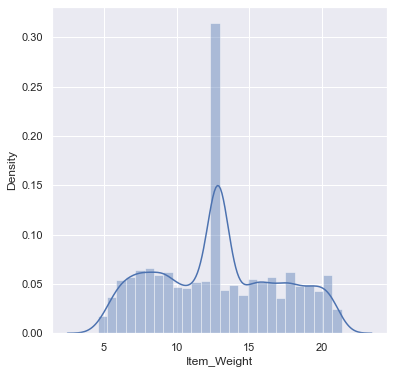

In [48]:
plt.figure(figsize = (6,6))
sns.distplot(big_mart['Item_Weight'])
plt.show()

G:\downloads\New folder (2)\New folder (2)\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


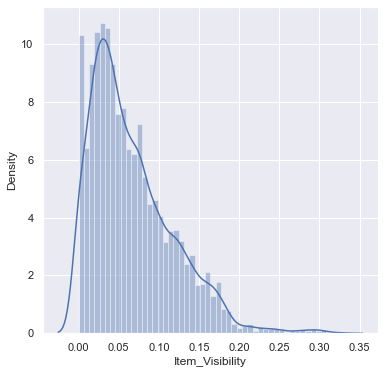

In [49]:
plt.figure(figsize = (6,6))
sns.distplot(big_mart['Item_Visibility'])
plt.show()

G:\downloads\New folder (2)\New folder (2)\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


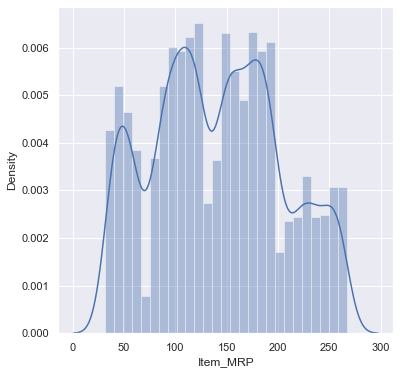

In [50]:
plt.figure(figsize = (6,6))
sns.distplot(big_mart['Item_MRP'])
plt.show()

G:\downloads\New folder (2)\New folder (2)\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


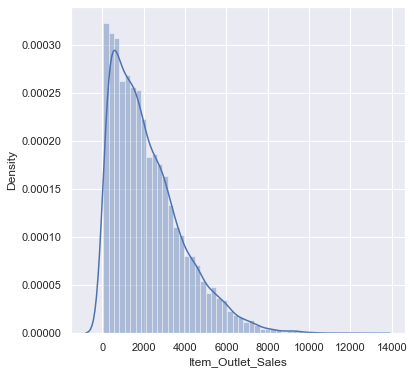

In [51]:
plt.figure(figsize = (6,6))
sns.distplot(big_mart['Item_Outlet_Sales'])
plt.show()

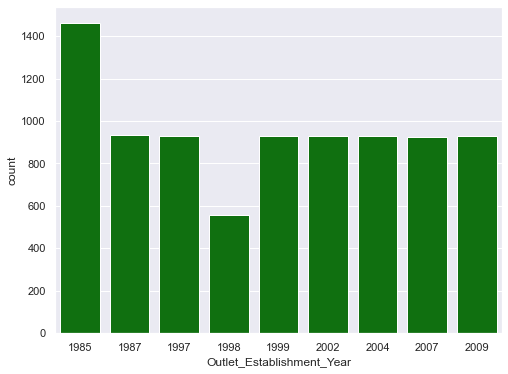

In [70]:
plt.figure(figsize = (8,6))
sns.countplot(x='Outlet_Establishment_Year', data=big_mart,color='green')
plt.show()

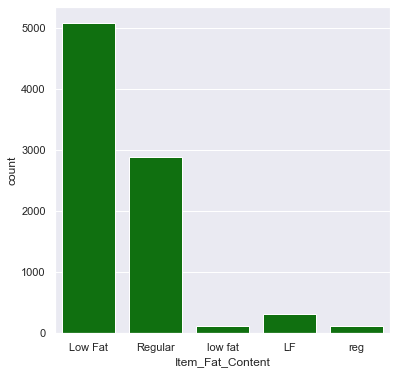

In [56]:
plt.figure(figsize = (6,6))
sns.countplot(x='Item_Fat_Content', data=big_mart,color='green')
plt.show()

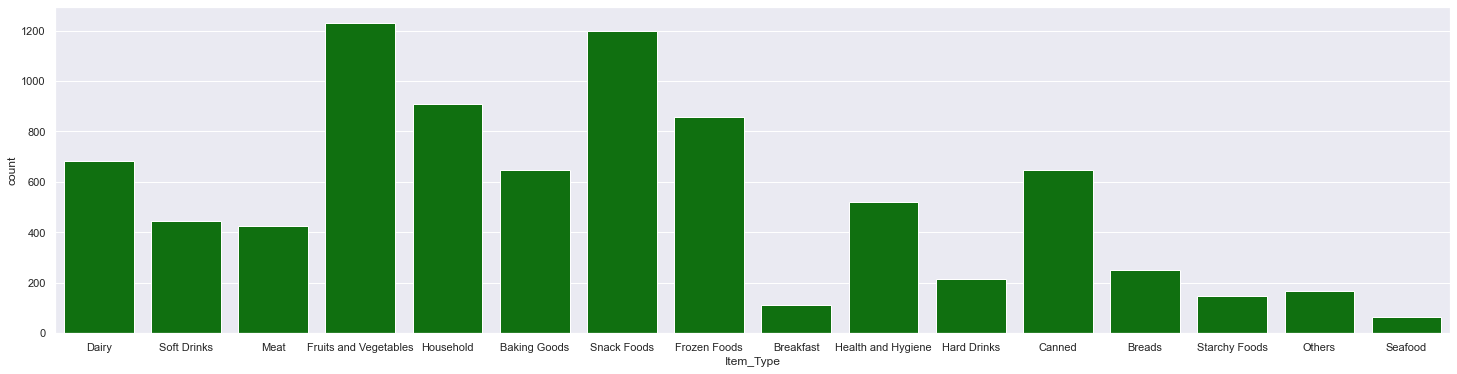

In [64]:
plt.figure(figsize = (25,6))
sns.countplot(x='Item_Type', data=big_mart,color='green')
plt.show()

# Data pre processing

In [74]:
big_mart.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Outlet_Type Grocery Store Supermarket Type1 Su...,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [76]:
big_mart['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [81]:
big_mart.replace({'Item_Fat_Content':{'Low Fat':'Low Fat','LF':'Low Fat','reg':'Reglur'}},inplace=True)

In [82]:
big_mart['Item_Fat_Content'].value_counts()

Low Fat    5405
Regular    2889
Reglur      117
low fat     112
Name: Item_Fat_Content, dtype: int64

# label encoding

In [87]:
encoder = LabelEncoder()

In [94]:
big_mart['Item_Identifier'] = encoder.fit_transform(big_mart['Item_Identifier'])

big_mart['Item_Fat_Contentr'] = encoder.fit_transform(big_mart['Item_Fat_Content'])

big_mart['Item_Type'] = encoder.fit_transform(big_mart['Item_Type'])

big_mart['Outlet_Identifier'] = encoder.fit_transform(big_mart['Outlet_Identifier'])

# big_mart['Outlet_Size'] = encoder.fit_transform(big_mart['Outlet_Size'])

big_mart['Outlet_Location_Type'] = encoder.fit_transform(big_mart['Outlet_Location_Type'])

big_mart['Outlet_Type'] = encoder.fit_transform(big_mart['Outlet_Type'])

In [95]:
big_mart.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Fat_Contentr
0,156,9.30,0,0.016047,4,5592,9,1999,Medium,0,1,3735.1380,0
1,8,5.92,2,0.019278,14,473,3,2009,Medium,2,2,443.4228,2
2,662,17.50,0,0.016760,10,2901,9,1999,Medium,0,1,2097.2700,0
3,1121,19.20,2,0.000000,6,4227,0,1998,Outlet_Type Grocery Store Supermarket Type1 Su...,2,0,732.3800,2
4,1297,8.93,0,0.000000,9,627,1,1987,High,2,1,994.7052,0


In [96]:
X = big_mart.drop(columns='Item_Outlet_Sales', axis=1)
y = big_mart['Item_Outlet_Sales']

In [107]:
X = big_mart.drop(columns=['Item_Outlet_Sales','Outlet_Size'], axis=1)
y = big_mart['Item_Outlet_Sales']

In [108]:
print(X)

      Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  \
0                 156        9.300                 0         0.016047   
1                   8        5.920                 2         0.019278   
2                 662       17.500                 0         0.016760   
3                1121       19.200                 2         0.000000   
4                1297        8.930                 0         0.000000   
...               ...          ...               ...              ...   
8518              370        6.865                 0         0.056783   
8519              897        8.380                 2         0.046982   
8520             1357       10.600                 0         0.035186   
8521              681        7.210                 2         0.145221   
8522               50       14.800                 0         0.044878   

      Item_Type  Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  \
0             4      5592                  9    

In [109]:
print(y)

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64


In [110]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=2)


In [111]:
print(X.shape, X_train.shape, X_test.shape)

(8523, 11) (6818, 11) (1705, 11)


In [112]:
regressor = XGBRegressor()

In [113]:
regressor.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

# Evaluation

In [115]:
training_prediction = regressor.predict(X_train)

In [117]:
r2_train = metrics.r2_score(y_train,training_prediction)

In [124]:
print('R squared value = ', r2_train)

R squared value =  0.8612363229964591


In [120]:
test_prediction = regressor.predict(X_test)

In [121]:
r2_test = metrics.r2_score(y_test,test_prediction)

In [123]:
print('R squared value = ', r2_test)

R squared value =  0.52953636038723
